In [2]:
import requests
import json
import websockets
import asyncio
import krakenex
from pykrakenapi import KrakenAPI
import pandas as pd
import time
import config
from tqdm import tqdm

In [2]:
pip install websockets

  Using cached websockets-9.1-cp38-cp38-manylinux2010_x86_64.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
STREAM_URL = 'wss://ws.kraken.com'
AUTH_URL = "wss://ws-auth.kraken.com"
TOKEN_URL = "https://api.kraken.com/0/private/GetWebSocketsToken"
KRAKEN_API = "https://api.kraken.com/0/public/Assets"
API_KEY = config.API_KEY
PRIVATE_KEY = config.PRIVATE_KEY

In [6]:
payload = {"event": "subscribe",
           "pair": [
               "BTC/EUR",
               "ADA/EUR"
           ],
           "subscription": {
               "name": "ticker"
           }
          }

In [7]:
async def test():
    async with websockets.connect(STREAM_URL) as websocket:
        await websocket.send(payload)
        print(payload)

        answer = await websocket.recv()
        print(f"< {answer}")
test()

<coroutine object test at 0x7f74fbc4c540>

In [4]:
api = krakenex.API(key=API_KEY, secret=PRIVATE_KEY)
k = KrakenAPI(api)
data = k.get_asset_info()
data.head(20)

,aclass,altname,decimals,display_decimals
1INCH,currency,1INCH,10,5
AAVE,currency,AAVE,10,5
ADA,currency,ADA,8,6
ADA.S,currency,ADA.S,8,6
ALGO,currency,ALGO,8,5
ANKR,currency,ANKR,10,5
ANT,currency,ANT,10,5
ATOM,currency,ATOM,8,6
ATOM.S,currency,ATOM.S,8,6
AXS,currency,AXS,10,5


In [5]:
data1 = requests.get(KRAKEN_API).json()
data1

{'error': [],
 'result': {'1INCH': {'aclass': 'currency',
   'altname': '1INCH',
   'decimals': 10,
   'display_decimals': 5},
  'AAVE': {'aclass': 'currency',
   'altname': 'AAVE',
   'decimals': 10,
   'display_decimals': 5},
  'ADA': {'aclass': 'currency',
   'altname': 'ADA',
   'decimals': 8,
   'display_decimals': 6},
  'ADA.S': {'aclass': 'currency',
   'altname': 'ADA.S',
   'decimals': 8,
   'display_decimals': 6},
  'ALGO': {'aclass': 'currency',
   'altname': 'ALGO',
   'decimals': 8,
   'display_decimals': 5},
  'ANKR': {'aclass': 'currency',
   'altname': 'ANKR',
   'decimals': 10,
   'display_decimals': 5},
  'ANT': {'aclass': 'currency',
   'altname': 'ANT',
   'decimals': 10,
   'display_decimals': 5},
  'ATOM': {'aclass': 'currency',
   'altname': 'ATOM',
   'decimals': 8,
   'display_decimals': 6},
  'ATOM.S': {'aclass': 'currency',
   'altname': 'ATOM.S',
   'decimals': 8,
   'display_decimals': 6},
  'AXS': {'aclass': 'currency',
   'altname': 'AXS',
   'decimals': 

In [7]:
pairs = k.get_tradable_asset_pairs()
pairs[pairs["base"] == "XMLN"].tail(20)

,altname,wsname,aclass_base,base,aclass_quote,quote,lot,pair_decimals,lot_decimals,lot_multiplier,leverage_buy,leverage_sell,fees,fees_maker,fee_volume_currency,margin_call,margin_stop,ordermin
GNOETH,GNOETH,GNO/ETH,currency,GNO,currency,XETH,unit,4,8,1,[],[],"[[0, 0.26], [50000, 0.24], [100000, 0.22], [25...","[[0, 0.16], [50000, 0.14], [100000, 0.12], [25...",ZUSD,80,40,0.05
GNOEUR,GNOEUR,GNO/EUR,currency,GNO,currency,ZEUR,unit,2,8,1,[],[],"[[0, 0.26], [50000, 0.24], [100000, 0.22], [25...","[[0, 0.16], [50000, 0.14], [100000, 0.12], [25...",ZUSD,80,40,0.05
GNOUSD,GNOUSD,GNO/USD,currency,GNO,currency,ZUSD,unit,2,8,1,[],[],"[[0, 0.26], [50000, 0.24], [100000, 0.22], [25...","[[0, 0.16], [50000, 0.14], [100000, 0.12], [25...",ZUSD,80,40,0.05
GNOXBT,GNOXBT,GNO/XBT,currency,GNO,currency,XXBT,unit,5,8,1,[],[],"[[0, 0.26], [50000, 0.24], [100000, 0.22], [25...","[[0, 0.16], [50000, 0.14], [100000, 0.12], [25...",ZUSD,80,40,0.05


In [15]:
ticker = k.get_ticker_information("XLMXBT")
ticker.T

,XXLMXXBT
a,"[0.000007010, 66213, 66213.000]"
b,"[0.000007000, 20644, 20644.000]"
c,"[0.000007000, 35.00000000]"
h,"[0.000007120, 0.000007140]"
l,"[0.000006950, 0.000006950]"
o,0.000007040
p,"[0.000007050, 0.000007078]"
t,"[314, 472]"
v,"[154488.64514968, 355038.36098686]"


In [8]:
help(KrakenAPI)

Help on class KrakenAPI in module pykrakenapi.pykrakenapi:

class KrakenAPI(builtins.object)
 |  KrakenAPI(api, tier='Intermediate', retry=1, crl_sleep=5)
 |  
 |  A python implementation of the Kraken API.
 |  
 |  Implements the Kraken API methods using the low-level krakenex python
 |  package. See
 |  https://www.kraken.com/help/api
 |  and
 |  https://github.com/veox/python3-krakenex
 |  
 |  Parameters
 |  ----------
 |  api : krakenex.API
 |      An instance of the krakenex.API class. A reference to the input
 |      is created and accessible via ``KrakenAPI.api``.
 |  
 |  tier : str, optional (default='Intermediate')
 |      Your Kraken tier level, used to adjust the limit of the call rate to
 |      the Kraken API in order to prevent 15 minute temporary lockouts.
 |      Must be one of {'None', 'Starter', 'Intermediate', 'Pro'}.
 |      Set tier='None' to disable the call rate limiter.
 |      See https://support.kraken.com/hc/en-us/articles/206548367.
 |  
 |  retry : float,

In [194]:
currencies = data["altname"].to_list()[:-7]
currencies.append('ZRX')
currencies = [currency for currency in currencies if not currency == "CH" and "." not in currency]
currencies

['1INCH',
 'AAVE',
 'ADA',
 'ALGO',
 'ANKR',
 'ANT',
 'ATOM',
 'AXS',
 'BADGER',
 'BAL',
 'BAND',
 'BAT',
 'BCH',
 'BNT',
 'COMP',
 'CQT',
 'CRV',
 'CTSI',
 'DAI',
 'DASH',
 'DOT',
 'ENJ',
 'EOS',
 'ETH2',
 'EWT',
 'FIL',
 'FLOW',
 'FLOWH',
 'GHST',
 'GNO',
 'GRT',
 'ICX',
 'INJ',
 'KAR',
 'KAVA',
 'KEEP',
 'FEE',
 'KNC',
 'KSM',
 'LINK',
 'LPT',
 'LRC',
 'LSK',
 'MANA',
 'MATIC',
 'MINA',
 'MIR',
 'MKR',
 'NANO',
 'OCEAN',
 'OGN',
 'OMG',
 'OXT',
 'PAXG',
 'PERP',
 'QTUM',
 'RARI',
 'REN',
 'REPV2',
 'SAND',
 'SC',
 'SNX',
 'SOL',
 'SRM',
 'STORJ',
 'SUSHI',
 'TBTC',
 'TRX',
 'UNI',
 'USDC',
 'USDT',
 'WAVES',
 'WBTC',
 'ETC',
 'ETH',
 'LTC',
 'MLN',
 'REP',
 'XTZ',
 'XBT',
 'XDG',
 'XLM',
 'XMR',
 'XRP',
 'ZEC',
 'YFI',
 'ZRX']

In [195]:
ohlc_dict = {}
timestamp = int(time.time() * 1000)
for currency in tqdm(currencies):
    print(currency)
    ohlc_dict[currency] = k.get_ohlc_data(f"{currency}EUR", ascending=True, interval=1440)[0]

  0%|          | 0/87 [00:00<?, ?it/s]

1INCH


  1%|          | 1/87 [00:00<00:17,  4.88it/s]

AAVE
public call frequency exceeded (seconds=0.205603) 
 sleeping for 5 seconds


  2%|▏         | 2/87 [00:05<04:28,  3.16s/it]

ADA
public call frequency exceeded (seconds=0.223839) 
 sleeping for 5 seconds


  3%|▎         | 3/87 [00:10<05:48,  4.15s/it]

ALGO
public call frequency exceeded (seconds=0.316753) 
 sleeping for 5 seconds


  5%|▍         | 4/87 [00:16<06:28,  4.69s/it]

ANKR
public call frequency exceeded (seconds=0.510718) 
 sleeping for 5 seconds


  6%|▌         | 5/87 [00:21<06:40,  4.88s/it]

ANT
public call frequency exceeded (seconds=0.220864) 
 sleeping for 5 seconds


  7%|▋         | 6/87 [00:26<06:45,  5.00s/it]

ATOM
public call frequency exceeded (seconds=0.231389) 
 sleeping for 5 seconds


  7%|▋         | 6/87 [00:27<06:05,  4.51s/it]


KeyboardInterrupt: 

In [14]:
ohlc_nano = k.get_ohlc_data("XLMXBT", ascending=True, interval=720)[0]
ohlc_nano

attempt: 000 | ['EQuery:Unknown asset pair']
attempt: 001 | ['EQuery:Unknown asset pair']
attempt: 002 | ['EQuery:Unknown asset pair']
attempt: 003 | ['EQuery:Unknown asset pair']
attempt: 004 | ['EQuery:Unknown asset pair']


KeyboardInterrupt: 

In [157]:
ohlc_btc = k.get_ohlc_data("BTCEUR", interval=240, ascending=True, since=0)[0]
ohlc_btc

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-04-23 20:00:00,1619208000,42230.9,42566.2,41657.1,42349.0,42162.1,650.252005,8396
2021-04-24 00:00:00,1619222400,42349.0,42362.5,41061.9,41715.2,41577.2,714.505097,5351
2021-04-24 04:00:00,1619236800,41726.5,42109.2,41505.0,41597.9,41821.7,419.079890,5217
2021-04-24 08:00:00,1619251200,41597.9,41915.7,40600.0,40885.9,41306.8,1019.451598,11299
2021-04-24 12:00:00,1619265600,40885.8,41757.2,40718.6,41691.3,41236.8,443.847534,6637
...,...,...,...,...,...,...,...,...
2021-08-21 00:00:00,1629504000,42210.9,42241.9,42000.0,42000.1,42010.3,1151.204670,14897
2021-08-21 04:00:00,1629518400,42000.1,42080.0,41900.0,42059.3,41957.6,1081.926422,16734
2021-08-21 08:00:00,1629532800,42066.4,42460.9,41550.1,41731.0,41962.2,4345.506198,15714


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
ohlc_atom_btc = k.get_ohlc_data("ATOMBTC", ascending=True, interval=240)[0]
ohlc_atom_btc

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-04-23 20:00:00,1619208000,0.000392,0.000405,0.000391,0.000403,0.000400,5836.537158,236
2021-04-24 00:00:00,1619222400,0.000399,0.000400,0.000387,0.000394,0.000390,3518.571291,155
2021-04-24 04:00:00,1619236800,0.000395,0.000398,0.000387,0.000391,0.000394,625.455943,63
2021-04-24 08:00:00,1619251200,0.000391,0.000396,0.000380,0.000381,0.000388,1808.445956,97
2021-04-24 12:00:00,1619265600,0.000383,0.000387,0.000376,0.000383,0.000383,2869.330663,105
...,...,...,...,...,...,...,...,...
2021-08-21 00:00:00,1629504000,0.000383,0.000393,0.000380,0.000393,0.000388,4188.513552,107
2021-08-21 04:00:00,1629518400,0.000392,0.000399,0.000390,0.000399,0.000396,4542.932440,138
2021-08-21 08:00:00,1629532800,0.000398,0.000447,0.000396,0.000445,0.000426,43232.105101,745


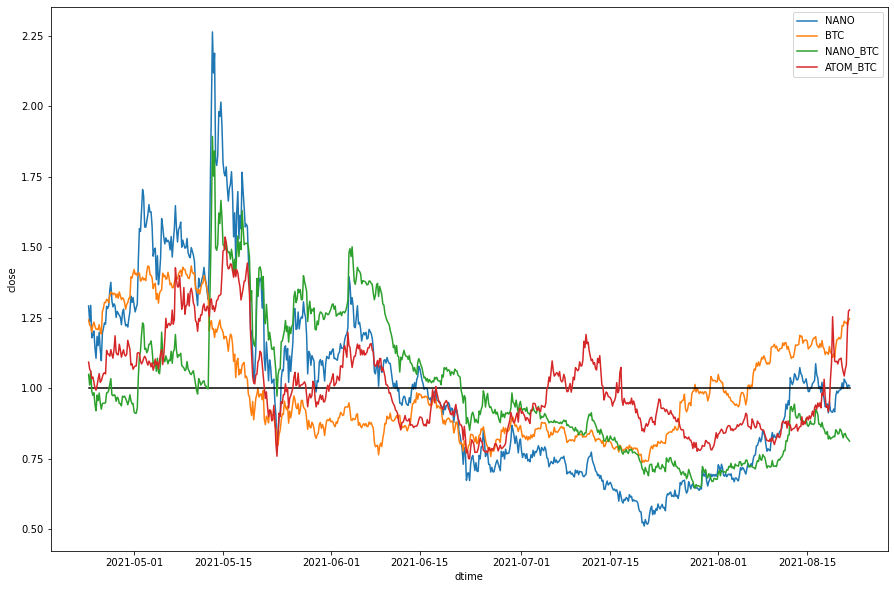

In [171]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.lineplot(x=ohlc_btc.index, y=(ohlc_nano["close"] / ohlc_nano["close"].mean()), label="NANO")
sns.lineplot(x=ohlc_btc.index, y=(ohlc_btc["close"] / ohlc_btc["close"].mean()), label="BTC")
sns.lineplot(x=ohlc_btc.index, y=1, color="black")
sns.lineplot(x=ohlc_btc.index, y=(ohlc_nano_btc["close"] / ohlc_nano_btc["close"].mean()), label="NANO_BTC")
sns.lineplot(x=ohlc_btc.index, y=(ohlc_atom_btc["close"] / ohlc_atom_btc["close"].mean()), label="ATOM_BTC")
plt.show()

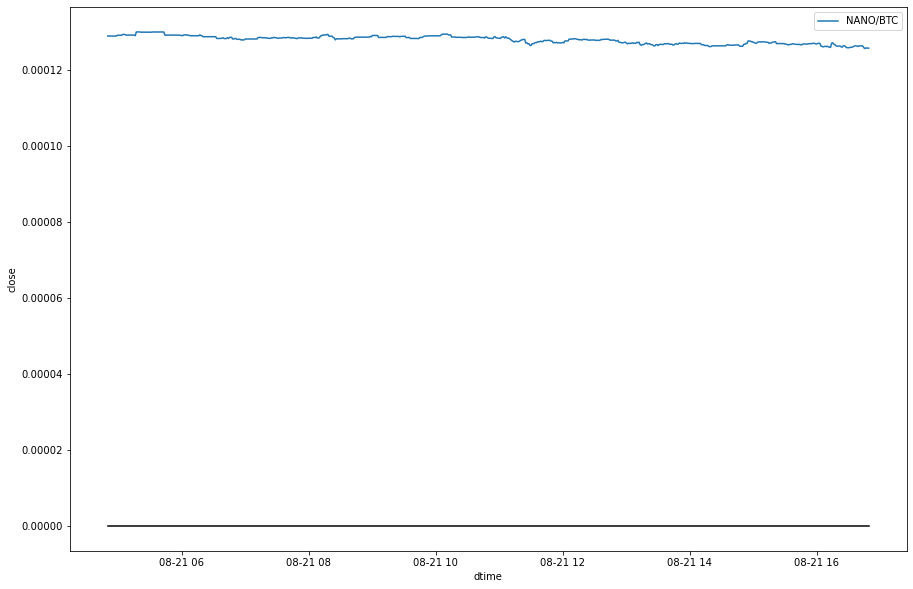

In [145]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.lineplot(x=ohlc_btc.index, y=(ohlc_nano["close"] / ohlc_btc["close"]), label="NANO/BTC")
sns.lineplot(x=ohlc_btc.index, y=0, color="black")
plt.show()

In [130]:
ohlc[0]['20 SMA'] = ohlc[0]['close'].rolling(20).mean()
ohlc[0].tail()

,time,open,high,low,close,vwap,volume,count,20 SMA
dtime,,,,,,,,,
2021-08-21 01:00:00,1629507600,5.418442,5.424726,5.398174,5.398175,5.403830,1295.958926,29,5.371371
2021-08-21 02:00:00,1629511200,5.448189,5.512088,5.448189,5.466483,5.487024,1026.429075,37,5.378695
2021-08-21 03:00:00,1629514800,5.481229,5.481229,5.432084,5.432354,5.452330,801.663503,16,5.386766
2021-08-21 04:00:00,1629518400,5.440083,5.440083,5.404100,5.412386,5.419797,775.332948,17,5.392760
2021-08-21 05:00:00,1629522000,5.421491,5.461854,5.421491,5.461854,5.450074,9.916620,4,5.400032


In [ ]:
while True:
    
    try:
        BTC_old = float((kraken.get_ticker_information('BTCUSD'))['b'][0][0])
    except Exception as e:
        print(f'Unable to obtain BTC data: {e}')
    
    sleep(60)
    
    try:
        BTC_new = float((kraken.get_ticker_information('BTCUSD'))['b'][0][0])
    except Exception as e:
        print(f'Unable to obtain BTC data: {e}')
    
    percent = ((BTC_new - BTC_old)*100) / BTC_old
    
    if percent >= 5:
        try:
            ETH = float((kraken.get_ticker_information('ETHUSD'))['a'][0][0]) + 2
            
            response = kraken.add_standard_order(pair='ETHUSD', type='buy', ordertype='limit', 
                                                 volume='0.007', price=ETH, validate=False)
            print(response)
        except Exception as e:
            print(f'Error placing order: {e}')
    
        sleep(3)
    
        check_order = kraken.query_orders_info(response['txid'][0])
    
        if check_order['status'][0] == 'open' or 'closed':
            print('Order completed sucessfully')
            break
        else:
            print('Order rejected')
            break
    else:
        print('Requirement not reached')

In [41]:
book = k.get_order_book('NANOEUR', count = 20)
print(book[0].head())
print(book[1].head())

                        price   volume        time
dtime                                             
2021-08-21 05:28:28  5.461161  208.515  1629523708
2021-08-21 05:28:27  5.449000   51.000  1629523707
2021-08-21 05:28:27  5.476747  390.150  1629523707
2021-08-21 05:28:27  5.462640  659.360  1629523707
2021-08-21 05:28:25  5.451931   28.100  1629523705
                        price    volume        time
dtime                                              
2021-08-21 05:28:27  5.435641   182.437  1629523707
2021-08-21 05:28:27  5.435640   653.589  1629523707
2021-08-21 05:28:27  5.430733   137.781  1629523707
2021-08-21 05:28:27  5.390002  1902.869  1629523707
2021-08-21 05:28:26  5.432624    98.909  1629523706


In [42]:
df = pd.merge(book[0], book[1], left_index=True, right_index=True)
df = df.rename({"price_x":"Bid Price","volume_x":"Bid Amount", "time_x":"Bid Time",
                "price_y":"Ask Price","volume_y":"Ask Amount", "time_y":"Ask Time"}, axis='columns')
df

,Bid Price,Bid Amount,Bid Time,Ask Price,Ask Amount,Ask Time
dtime,,,,,,
2021-08-21 05:24:21,5.476743,281.000,1629523461,5.420071,281.000,1629523461
2021-08-21 05:27:46,5.457337,68.997,1629523666,5.405239,1691.000,1629523666
2021-08-21 05:27:46,5.455861,81.493,1629523666,5.405239,1691.000,1629523666
2021-08-21 05:28:24,5.462604,10.882,1629523704,5.390001,183.631,1629523704
2021-08-21 05:28:27,5.449000,51.000,1629523707,5.435641,182.437,1629523707
2021-08-21 05:28:27,5.449000,51.000,1629523707,5.435640,653.589,1629523707
2021-08-21 05:28:27,5.449000,51.000,1629523707,5.430733,137.781,1629523707
2021-08-21 05:28:27,5.449000,51.000,1629523707,5.390002,1902.869,1629523707
2021-08-21 05:28:27,5.476747,390.150,1629523707,5.435641,182.437,1629523707


In [121]:
int(time.time() * 1000)

1629544840917

(Empty DataFrame
 Columns: []
 Index: [],
 0)

In [ ]:
from __future__ import print_function, division

from tensorflow.keras.datasets import mnist
from keras.layers.merge import _Merge
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.layers.convolutional import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from functools import partial

import keras.backend as K

import matplotlib.pyplot as plt

import sys

import numpy as np

class RandomWeightedAverage(_Merge):
    """Provides a (random) weighted average between real and generated image samples"""
    def _merge_function(self, inputs):
        alpha = K.random_uniform((32, 1, 1, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])

class WGANGP():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        optimizer = RMSprop(lr=0.00005)

        # Build the generator and critic
        self.generator = self.build_generator()
        self.critic = self.build_critic()

        #-------------------------------
        # Construct Computational Graph
        #       for the Critic
        #-------------------------------

        # Freeze generator's layers while training critic
        self.generator.trainable = False

        # Image input (real sample)
        real_img = Input(shape=self.img_shape)

        # Noise input
        z_disc = Input(shape=(self.latent_dim,))
        # Generate image based of noise (fake sample)
        fake_img = self.generator(z_disc)

        # Discriminator determines validity of the real and fake images
        fake = self.critic(fake_img)
        valid = self.critic(real_img)

        # Construct weighted average between real and fake images
        interpolated_img = RandomWeightedAverage()([real_img, fake_img])
        # Determine validity of weighted sample
        validity_interpolated = self.critic(interpolated_img)

        # Use Python partial to provide loss function with additional
        # 'averaged_samples' argument
        partial_gp_loss = partial(self.gradient_penalty_loss,
                          averaged_samples=interpolated_img)
        partial_gp_loss.__name__ = 'gradient_penalty' # Keras requires function names

        self.critic_model = Model(inputs=[real_img, z_disc],
                            outputs=[valid, fake, validity_interpolated])
        self.critic_model.compile(loss=[self.wasserstein_loss,
                                              self.wasserstein_loss,
                                              partial_gp_loss],
                                        optimizer=optimizer,
                                        loss_weights=[1, 1, 10])
        #-------------------------------
        # Construct Computational Graph
        #         for Generator
        #-------------------------------

        # For the generator we freeze the critic's layers
        self.critic.trainable = False
        self.generator.trainable = True

        # Sampled noise for input to generator
        z_gen = Input(shape=(self.latent_dim,))
        # Generate images based of noise
        img = self.generator(z_gen)
        # Discriminator determines validity
        valid = self.critic(img)
        # Defines generator model
        self.generator_model = Model(z_gen, valid)
        self.generator_model.compile(loss=self.wasserstein_loss, optimizer=optimizer)


    def gradient_penalty_loss(self, y_true, y_pred, averaged_samples):
        """
        Computes gradient penalty based on prediction and weighted real / fake samples
        """
        gradients = K.gradients(y_pred, averaged_samples)[0]
        # compute the euclidean norm by squaring ...
        gradients_sqr = K.square(gradients)
        #   ... summing over the rows ...
        gradients_sqr_sum = K.sum(gradients_sqr,
                                  axis=np.arange(1, len(gradients_sqr.shape)))
        #   ... and sqrt
        gradient_l2_norm = K.sqrt(gradients_sqr_sum)
        # compute lambda * (1 - ||grad||)^2 still for each single sample
        gradient_penalty = K.square(1 - gradient_l2_norm)
        # return the mean as loss over all the batch samples
        return K.mean(gradient_penalty)


    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=4, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake =  np.ones((batch_size, 1))
        dummy = np.zeros((batch_size, 1)) # Dummy gt for gradient penalty
        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                # Train the critic
                d_loss = self.critic_model.train_on_batch([imgs, noise],
                                                                [valid, fake, dummy])

            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.generator_model.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss[0], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/mnist_%d.png" % epoch)
        plt.close()


if __name__ == '__main__':
    wgan = WGANGP()
    wgan.train(epochs=30000, batch_size=32, sample_interval=100)

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (/home/michael/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/context.py)

In [197]:
pip install keras

     |████████████████████████████████| 1.3 MB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
lists = len((1,2,3,4,5,6,7,8,9))
span = list(np.array(lists) - )

4